In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
coordinates=list(lat_lngs)

In [30]:
from citipy import citipy
cities=[]

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

618

In [15]:
#API
import requests
from config import weather_api_key
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url=url+"&q="+"Boston"
city_weather=requests.get(city_url)

city_weather  #city_weather.status_code will give us: 200 so we have data

<Response [200]>

In [22]:
boston_data=city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 73.13,
  'feels_like': 73.9,
  'temp_min': 70.63,
  'temp_max': 75.15,
  'pressure': 1011,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 252, 'gust': 11.01},
 'clouds': {'all': 20},
 'dt': 1631163111,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1631182693,
  'sunset': 1631228706},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [ ]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat,lng,max_temp,humidity,clouds,wind)

In [25]:
#Convert the data timestamp: boston_data["dt"]
from datetime import datetime
date=boston_data["dt"]
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-09 04:51:51'

In [38]:
#6.2.6
city_data=[]
print("Beginning Data Retrieval")
print("-------------------------")

record_count=1
set_count=1
    
# instead of: for i in range(len(cities)):
#because this will throw an error, we used enumerate method
for i, city in enumerate(cities):
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
    #city_url=url+"&q="+cities[i]
    city_url=url+"&q="+city.replace(" ","+") #this will find the weather data for the city instead of the first part of city name
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

# If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
            pass #pass is a general purpose statement to handle all errors encountered and allow the program to continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | sosnovo-ozerskoye
Processing Record 6 of Set 1 | antsohihy
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | yaan
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kolokani
Processing Record 16 of Set 1 | mari-turek
Processing Record 17 of Set 1 | shizilu
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | erbaa
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | olafsvik
Processing Record 22 of Set 1 | sisimiut
P

Processing Record 39 of Set 4 | jumla
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | kenai
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 4 | irbeyskoye
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | harper
Processing Record 50 of Set 4 | nouakchott
Processing Record 1 of Set 5 | council bluffs
Processing Record 2 of Set 5 | coconut creek
Processing Record 3 of Set 5 | ranipur
Processing Record 4 of Set 5 | tiznit
Processing Record 5 of Set 5 | bushehr
Processing Record 6 of Set 5 | rio gallegos
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | avesta
Processing Record 9 of Set 5 | inuvik
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | may

Processing Record 24 of Set 8 | fortuna foothills
Processing Record 25 of Set 8 | kungurtug
Processing Record 26 of Set 8 | alofi
Processing Record 27 of Set 8 | gunjur
Processing Record 28 of Set 8 | sorong
Processing Record 29 of Set 8 | winslow
Processing Record 30 of Set 8 | maine-soroa
Processing Record 31 of Set 8 | terrace
Processing Record 32 of Set 8 | kemin
Processing Record 33 of Set 8 | carauari
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | saalfeld
Processing Record 37 of Set 8 | tombouctou
Processing Record 38 of Set 8 | mondlo
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | dikson
Processing Record 41 of Set 8 | toliary
City not found. Skipping...
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | shirgaon
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | san rafael
Processing Record 46 of Set 8 | kampong cham
Processing Record 47 of S

Processing Record 14 of Set 12 | nouadhibou
Processing Record 15 of Set 12 | molina
Processing Record 16 of Set 12 | puerto penasco
Processing Record 17 of Set 12 | santa rosa
Processing Record 18 of Set 12 | kiama
Processing Record 19 of Set 12 | kathmandu
Processing Record 20 of Set 12 | dongen
Processing Record 21 of Set 12 | sungaipenuh
Processing Record 22 of Set 12 | yucca valley
Processing Record 23 of Set 12 | devrek
Processing Record 24 of Set 12 | dzerzhinskoye
Processing Record 25 of Set 12 | coihaique
Processing Record 26 of Set 12 | consolacion del sur
Processing Record 27 of Set 12 | roald
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | iskateley
Processing Record 30 of Set 12 | nipawin
Processing Record 31 of Set 12 | yellandu
Processing Record 32 of Set 12 | san carlos de bariloche
Processing Record 33 of Set 12 | kismayo
Processing Record 34 of Set 12 | kintinku
Processing Record 35 of Set 12 | mwinilunga
Processing Record 36 of Set 12 | halalo

In [39]:
#6.2.7
#REWIND: convert a list of dictionnaries to a DataFrame
#df=pd.DataFrame(list of dict)

In [41]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.56,78,90,6.91,TO,2021-09-09 23:13:46
1,Saint George,37.1041,-113.5841,101.53,20,1,17.27,US,2021-09-09 23:13:46
2,Mataura,-46.1927,168.8643,50.49,92,99,6.55,NZ,2021-09-09 23:13:47
3,Sosnovo-Ozerskoye,52.5249,111.5418,38.98,95,52,1.83,RU,2021-09-09 23:13:47
4,Antsohihy,-14.8796,47.9875,68.31,84,0,2.44,MG,2021-09-09 23:13:48
5,Hobart,-42.8794,147.3294,53.06,63,40,4.00,AU,2021-09-09 23:13:48
6,Yaan,7.3833,8.5667,75.07,90,87,4.74,NG,2021-09-09 23:13:49
7,Chokurdakh,70.6333,147.9167,33.82,78,98,2.73,RU,2021-09-09 23:13:49
8,San Patricio,28.0170,-97.5169,96.89,31,0,10.36,US,2021-09-09 23:13:49
9,Pangnirtung,66.1451,-65.7125,37.92,70,94,3.47,CA,2021-09-09 23:13:50


In [44]:
#REWIND: 
#To reorder a data frame:
#new_order=["column1","column2","column3"]
#df=df[new_order]

new_column_order=["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-09-09 23:13:46,-21.2000,-175.2000,73.56,78,90,6.91
1,Saint George,US,2021-09-09 23:13:46,37.1041,-113.5841,101.53,20,1,17.27
2,Mataura,NZ,2021-09-09 23:13:47,-46.1927,168.8643,50.49,92,99,6.55
3,Sosnovo-Ozerskoye,RU,2021-09-09 23:13:47,52.5249,111.5418,38.98,95,52,1.83
4,Antsohihy,MG,2021-09-09 23:13:48,-14.8796,47.9875,68.31,84,0,2.44
...,...,...,...,...,...,...,...,...,...
561,Camapua,BR,2021-09-09 23:18:12,-19.5314,-54.0439,77.86,56,98,10.18
562,Yerbogachen,RU,2021-09-09 23:18:13,61.2767,108.0108,49.30,93,77,2.13
563,Sao Joao De Pirabas,BR,2021-09-09 23:18:13,-0.7747,-47.1772,79.32,78,65,8.50
564,Solnechnyy,RU,2021-09-09 23:18:13,50.7214,136.6319,54.68,92,94,5.46


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") #index_label (column A: City ID)

In [ ]:
#6.3.1

In [59]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

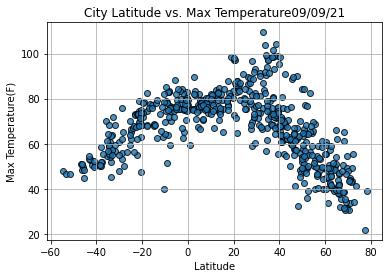

In [64]:
import time
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

In [66]:
#Latitude vs Max Temperature plot

In [67]:
######################################################################################################################

In [68]:
#6.3.2

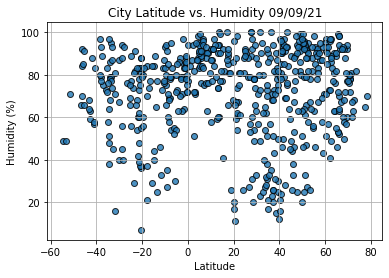

In [72]:
#latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

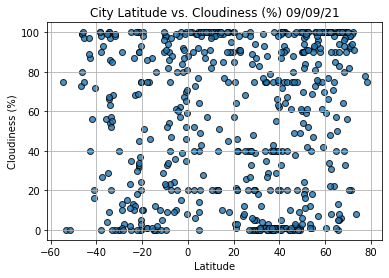

In [73]:
#latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

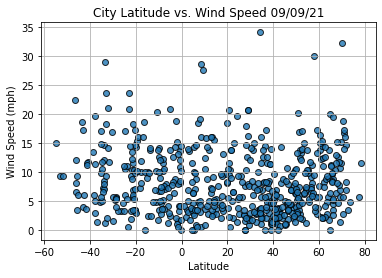

In [74]:
#latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()